In [18]:
import numpy as np
from sklearn.metrics import precision_recall_curve, roc_curve, auc, log_loss
import matplotlib.pyplot as plt

In [19]:
y_true = np.array([1., 1., 1., 1., 1., 0., 0., 0., 0.])
y_predicted = np.array([.9, .8, .6, .3, .4, .51, .2, .1, .3])

In [20]:
log_loss(y_true, y_predicted)

0.4842357917473723

In [21]:
auc(y_true, y_predicted)

0.455

[0.   0.   0.   0.25 0.25 0.5  1.  ]
[0.  0.2 0.6 0.6 0.8 1.  1. ]
[1.9  0.9  0.6  0.51 0.4  0.3  0.1 ]


0.875

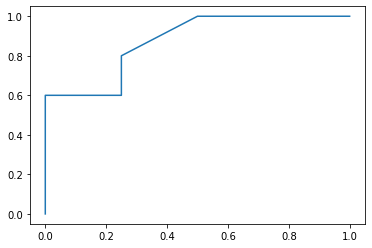

In [22]:
fpr, tpr, thresholds = roc_curve(y_true, y_predicted)
print(fpr)
print(tpr)
print(thresholds)
plt.plot(fpr, tpr)
auc(fpr, tpr)

In [23]:
precision, recall, thresholds = precision_recall_curve(y_true, y_predicted)
print(precision)
print(recall)
print(thresholds)
precision_recall_curve()

[0.71428571 0.8        0.75       1.         1.         1.
 1.        ]
[1.  0.8 0.6 0.6 0.4 0.2 0. ]
[0.3  0.4  0.51 0.6  0.8  0.9 ]


In [24]:
def classifier(y_true, y_predicted, threshold):
    TP, FN, FP, TN = 0, 0, 0, 0
    for i in range(len(y_true)):
        if (y_true[i] > threshold) & (y_predicted[i] > threshold):
           TP += 1
        if (y_true[i] < threshold) & (y_predicted[i] > threshold):
           FP += 1
        if (y_true[i] < threshold) & (y_predicted[i] < threshold):
           TN += 1
        if (y_true[i] > threshold) & (y_predicted[i] < threshold):
           FN += 1
    return TP, FN, FP, TN

In [25]:
TP, FN, FP, TN = classifier(y_true, y_predicted, .5)
print(TP, FN, FP, TN)
print("ACC (accuracy):", (TP + TN)/(TP + TN + FP + FN))
print("TPR (recall):", TP/(TP+FN))
print("FNR:", 1 - TP/(TP+FN))
print("TNR:", TN/(TN+FP))
print("FPR:", 1- TN/(TN+FP))
print("PPV or Precision:", TP/ (TP+FP))
print("FDR:", 1 - TP/ (TP+FP))

3 2 1 3
ACC (accuracy): 0.6666666666666666
TPR (recall): 0.6
FNR: 0.4
TNR: 0.75
FPR: 0.25
PPV or Precision: 0.75
FDR: 0.25


In [26]:
TP, FN, FP, TN = classifier(y_true, y_predicted, len(y_true), .75)
print(TP, FN, FP, TN)
print("ACC (accuracy):", (TP + TN)/(TP + TN + FP + FN))
print("TPR (recall):", TP/(TP+FN))
print("FNR:", 1 - TP/(TP+FN))
print("TNR:", TN/(TN+FP))
print("FPR:", 1- TN/(TN+FP))
print("PPV or Precision:", TP/ (TP+FP))
print("FDR:", 1 - TP/ (TP+FP))

TypeError: classifier() takes 3 positional arguments but 4 were given